# Load Packages

In [27]:
import  pandas  as  pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from   scipy.optimize import minimize
import pandas as pd
import altair as alt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"

# The path of the cleaned datasets

In [28]:
# directory containing the CSV files

path2 = '../../Dataset/project/Merged_downsample.csv'


In [29]:

df_selected = pd.read_csv(path2)


# Set Theme

In [30]:
plt.rcParams.update(plt.rcParamsDefault)
import matplotlib as mpl
from pathlib import Path
cfgdir = mpl.get_configdir() # find your configuration folder
p = Path(cfgdir)
print(p)
stylelib = (p / 'stylelib')
stylelib.mkdir(exist_ok=True)
path = stylelib / 'project.mplstyle' # create paths
path.write_text(''' # write into the file
axes.facecolor : F8F3F9
font.family : Arial
lines.linewidth : 5
xtick.labelsize : 16
ytick.labelsize : 16
axes.grid : True
grid.color : E0DDE1
grid.linestyle: dotted
grid.linewidth: 1.2
lines.linestyle : dotted
axes.titlesize : 23

lines.markersize : 14
axes.edgecolor : black
axes.linewidth : 2
axes.labelsize : 15
axes.labelcolor : black
axes.labelweight : normal
legend.title_fontsize : 16
axes.prop_cycle: cycler('color', ['9355AA', '6CAA55'])
figure.dpi : 200
''')

# LOAD STYLE 
plt.style.reload_library()
print('project' in plt.style.available)
# AFTER 
plt.style.use([ 'project'])

C:\Users\yzh20\.matplotlib
True


# Make some definition

In [31]:
alt.data_transformers.enable('json')
alt.data_transformers.enable('default', max_rows=None) 

DataTransformerRegistry.enable('default')

In [32]:
selection = alt.selection_single(fields=['Metropolitan Area'],name='Random')

# Set the colors being identical in these plots, every color in each one represents the same Metropolitan Area
color = alt.condition(selection,
                      alt.Color('Metropolitan Area:N', scale=alt.Scale(scheme='category20')),
                      alt.value('lightgray'),legend=alt.Legend(fillColor= 'grey'))

bar=(alt.Chart(df_selected)
 .mark_bar()
 .encode(y='mean(Mean Sale Price):Q',
         x=alt.X('Metropolitan Area:N',
         sort=alt.EncodingSortField(field='Mean Sale Price', op='mean', 
                            order='descending')),
         color=color
    
        )
).add_selection(selection)

bar.title ="The Mean Sales Price for Different MSA"
bar.encoding.x.title = 'Metropolitan Area'
bar.encoding.y.title = 'Sale Prices ($)'

color2 = alt.condition(selection,
                      alt.Color('Metropolitan Area:N'),
#                       alt.value('steelblue'),
                      alt.value('lightgray'))

line1=(alt.Chart(df_selected)
 .mark_line()
 .encode(x=alt.X('date:T'),
         y='mean(Mean Sale Price):Q',
         color=color2
        
    
        )
)

line1.title ="Mean Sale Prices For Each MSA"
line1.encoding.x.title = 'Date from (2018 to 2023)'
line1.encoding.y.title = 'Sale Prices ($)'






newfig_2 = (bar&line1)
newfig_2 = newfig_2.configure_axis(
    labelFontSize=12,    # increase font size for labels
 
    labelColor='black',  # set label color to black
    titleColor='black'   # set title color to black
)
newfig_2 

c:\Users\yzh20\anaconda3\lib\site-packages\altair\utils\core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

c:\Users\yzh20\anaconda3\lib\site-packages\altair\utils\core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

c:\Users\yzh20\anaconda3\lib\site-packages\altair\utils\core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.VConcatChart(...)

# Apply Theme

In [33]:
import altair as alt



newfig_2 = newfig_2.configure_axis(
    labelFontSize=12,    # increase font size for labels
    
    labelColor='black',  # set label color to black
    titleColor='black',   # set title color to black
    
)

newfig_2 = newfig_2.properties(background='#e0e0e0')
newfig_2


c:\Users\yzh20\anaconda3\lib\site-packages\altair\utils\core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

c:\Users\yzh20\anaconda3\lib\site-packages\altair\utils\core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

c:\Users\yzh20\anaconda3\lib\site-packages\altair\utils\core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.VConcatChart(...)

In [34]:
from altair_saver import save

# Use plotly.offline.plot to create and save the plot as an HTML file
save(newfig_2, '../../image/DataViz/bar.html')

c:\Users\yzh20\anaconda3\lib\site-packages\altair\utils\core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

c:\Users\yzh20\anaconda3\lib\site-packages\altair\utils\core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

c:\Users\yzh20\anaconda3\lib\site-packages\altair\utils\core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



In [35]:
plt.rcParams.update(plt.rcParamsDefault)

In [58]:
import matplotlib as mpl

# Set global figure settings
mpl.rcParams['figure.facecolor'] = '#E0E0E0'
mpl.rcParams['axes.facecolor'] = '#E0E0E0'
mpl.rcParams['savefig.facecolor'] = '#E0E0E0'


In [36]:
df_selected.head()

,date,Mean Sale Price,state,Mean Home Value,mean,Metropolitan Area
0,2018-08-31,394588.0,"Bend, OR",381885.667338,1489.368110,"Bend, OR"
1,2018-09-30,396351.0,"Bend, OR",383510.750632,1495.170848,"Bend, OR"
2,2018-10-31,391015.0,"Bend, OR",384594.684964,1492.019209,"Bend, OR"
3,2018-11-30,385500.0,"Bend, OR",385442.670086,1483.661094,"Bend, OR"
4,2018-12-31,384032.0,"Bend, OR",387043.568806,1482.177364,"Bend, OR"


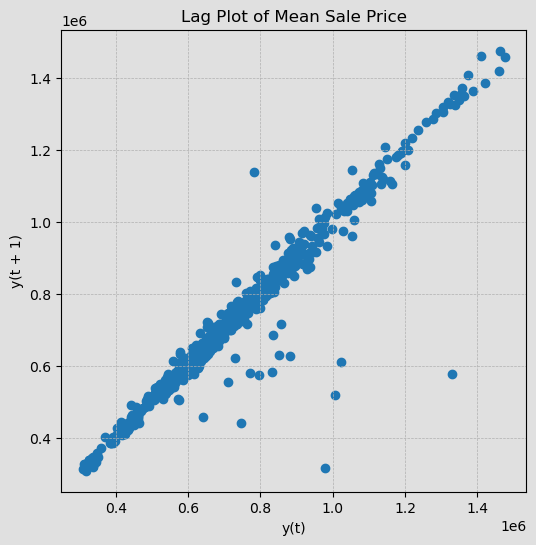

In [59]:
from pandas.plotting import lag_plot

plt.figure(figsize=(6, 6))
lag_plot(df_selected['Mean Sale Price'])
plt.title('Lag Plot of Mean Sale Price')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


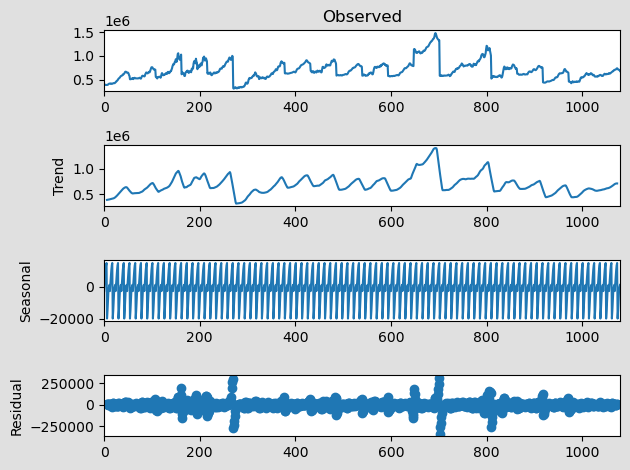

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing
result = seasonal_decompose(df_selected['Mean Sale Price'].values, model='additive', period=12)
fig = result.plot()
fig.set_facecolor('#E0E0E0')
plt.show()



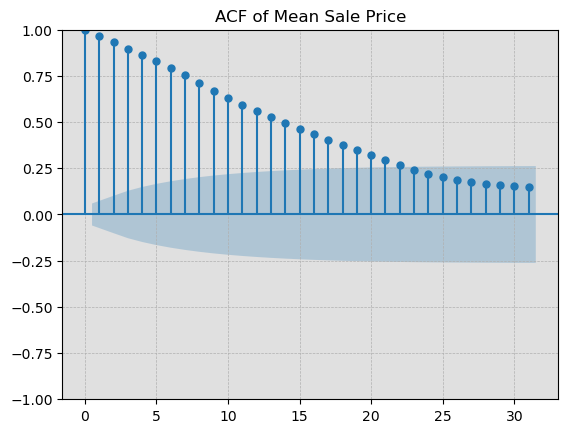

c:\Users\yzh20\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



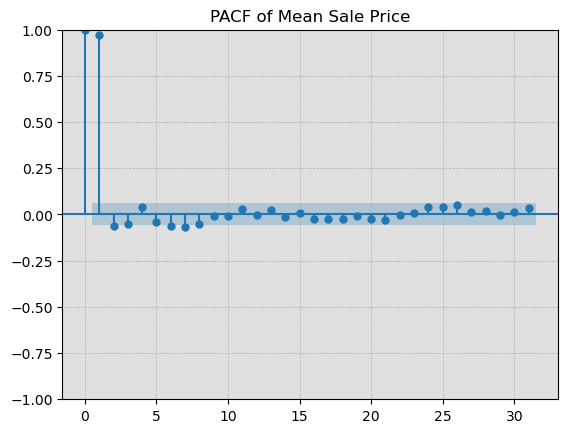

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plot_acf(df_selected['Mean Sale Price'])
plt.title('ACF of Mean Sale Price')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#E0E0E0')
plt.show()

# PACF plot
plot_pacf(df_selected['Mean Sale Price'])
plt.title('PACF of Mean Sale Price')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#E0E0E0')
plt.show()


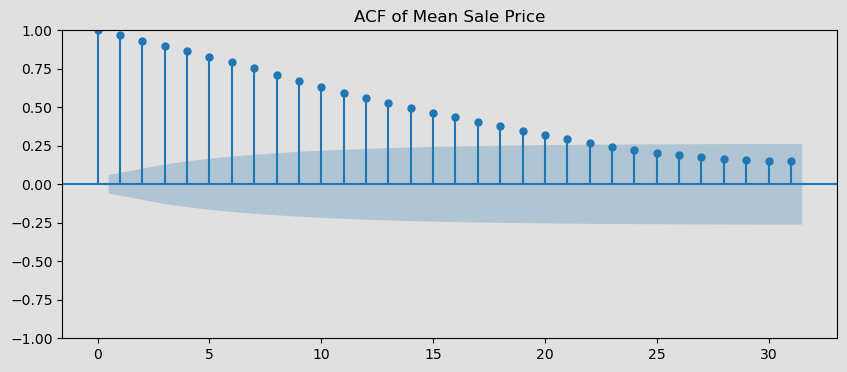

c:\Users\yzh20\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



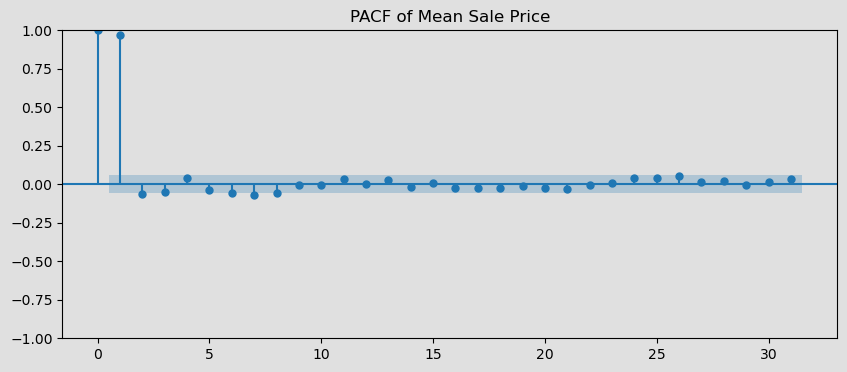

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(df_selected['Mean Sale Price'], ax=ax)
plt.title('ACF of Mean Sale Price')
plt.show()

# PACF plot
fig, ax = plt.subplots(figsize=(10, 4))
plot_pacf(df_selected['Mean Sale Price'], ax=ax)
plt.title('PACF of Mean Sale Price')
plt.show()


In [54]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_selected['Mean Sale Price'].values)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')


ADF Statistic: -5.271328121414674
p-value: 6.276331376552352e-06
Critical Values:
	1%: -3.4364647646486093
	5%: -2.864239892228526
	10%: -2.5682075189699822


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
# Filter only numeric columns
df_selected = df_selected.rename(columns={
    "mean": "Mean Rental Price",
    "Log_Mean_Sale_Price": "Log Mean Sale Price"
})


numeric_cols = df_selected.select_dtypes(include=[float, int])
numeric_cols

,Mean Sale Price,Mean Home Value,Mean Rental Price,Log Mean Sale Price,Detrended
0,394588.0,381885.667338,1489.368110,12.885597,NaN
1,396351.0,383510.750632,1495.170848,12.890055,1763.0
2,391015.0,384594.684964,1492.019209,12.876501,-5336.0
3,385500.0,385442.670086,1483.661094,12.862296,-5515.0
4,384032.0,387043.568806,1482.177364,12.858481,-1468.0
...,...,...,...,...,...
1075,710236.0,893886.503839,2653.029763,13.473353,-16232.0
1076,707295.0,888287.459018,2637.785413,13.469203,-2941.0
1077,705736.0,884266.420354,2643.828947,13.466997,-1559.0
1078,700518.0,879942.595152,2643.672423,13.459575,-5218.0


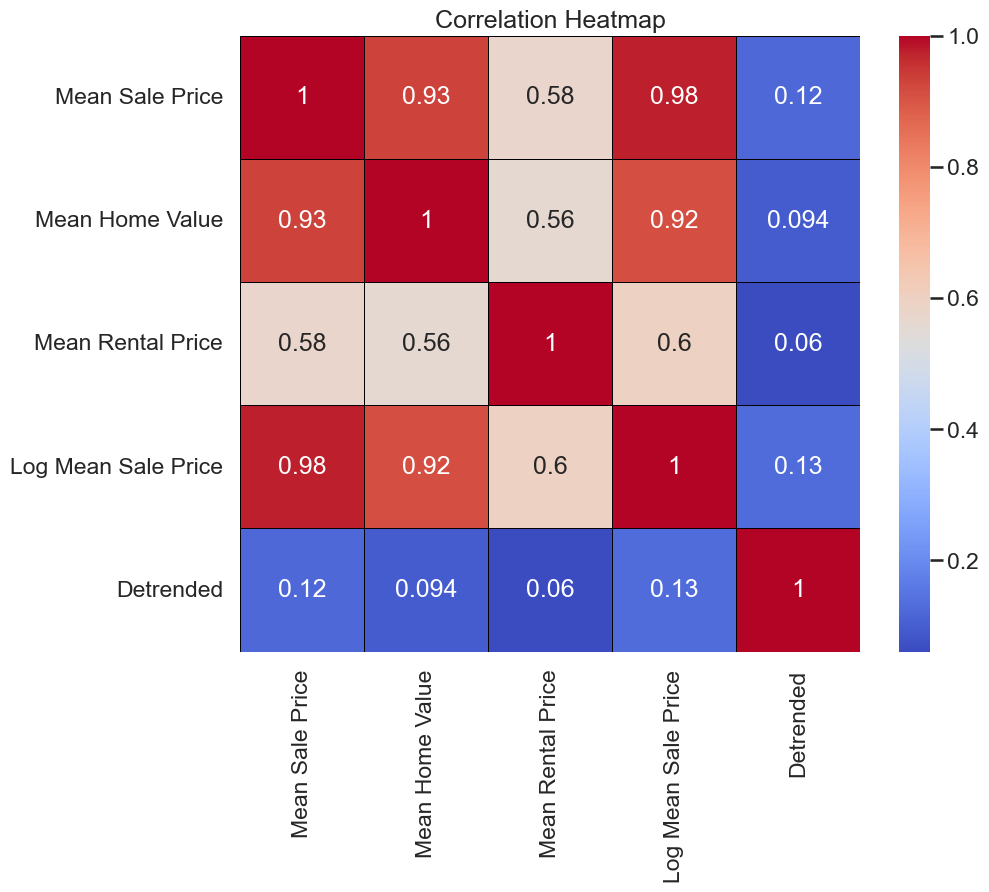

In [67]:


# Calculate correlations
corr = numeric_cols.corr()

# Set up the matplotlib figure with the desired theme
plt.figure(figsize=(10, 8))
sns.set_theme(style="white", rc={"axes.facecolor": "#E0E0E0", "grid.color": "#E0E0E0"})
sns.set_context("talk")

# Draw the heatmap with a color map of choice
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

# Adjust the plot's aesthetics
plt.title('Correlation Heatmap')
plt.show()
